In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from FCI_functions import calculate_post_score, calculate_pre_score, calculate_question_score_post, calculate_question_score_pre, calculate_pre_score_2020, calculate_post_score_2020, calculate_pre_score_2021, calculate_post_score_2021

In [2]:
df16_111 = pd.read_excel('rawdata/2016-17 WT1 Phys 111 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df16_112 = pd.read_excel('rawdata/2016-17 WT1 Phys 112 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df14_111 = pd.read_excel('rawdata/2014-15 WT1 Phys 111 ALL Data - Shared with Chelsea (20210212).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df14_112 = pd.read_excel('rawdata/2014-15 WT1 Phys 112 ALL Data - Shared with Chelsea (20210212).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df15_111 = pd.read_excel('rawdata/2015-16 WT1 Phys 111 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df15_112 = pd.read_excel('rawdata/2015-16 WT1 Phys 112 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df17_111 = pd.read_excel('rawdata/2017-18 WT1 Phys 111 ALL Data - Shared with David (20190612).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df17_112 = pd.read_excel('rawdata/2017-18 WT1 Phys 112 ALL Data - Shared with David (20190612).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df18_111 = pd.read_excel('rawdata/2018-19 WT1 Phys 111 ALL Data - Shared with David (20190530).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df18_112 = pd.read_excel('rawdata/2018-19 WT1 Phys 112 ALL Data - Shared with David (20190527).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)#.drop(df18_112[df18_112['Secondary'] == L15].index)

df19_111 = pd.read_excel('rawdata/2019-20 WT1 Phys 111 ALL Data - Shared with Maya (20211222).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
is_111_001 = df19_111['Lecture'] == 1
df19_111_001 = df19_111[is_111_001]
is_111_002 = df19_111['Lecture'] == 2
df19_111_002 = df19_111[is_111_002]

df19_112 = pd.read_excel('rawdata/2019-20 WT1 Phys 112 ALL Data - Shared with Maya (20211222).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
is_112_001 = df19_112['Lecture'] == 1
df19_112_001 = df19_112[is_112_001]
is_112_002 = df19_112['Lecture'] == 2
df19_112_002 = df19_112[is_112_002]

df20 = pd.read_excel('rawdata/2020-21 WT1 Phys 111&112 ALL Data - Shared with Chelsea (20210329).xlsx').replace(["BLANK", "!!", "MULT", 0], np.nan)
is_111 = df20['Course'] == 111
df20_111 = df20[is_111]
is_112 = df20['Course'] == 112
df20_112 = df20[is_112]

df21_111 = pd.read_excel('2021raw_corrected.xlsx')

In [3]:
num = len(df20_111.index)
df20_111["PRE Q38"].value_counts()

4.0    111
1.0    107
2.0     19
6.0      1
Name: PRE Q38, dtype: int64

In [4]:
df19_112_001

,Session,Course,Lecture,Secondary Section,Tertiary Section,Percent Grade,Letter Grade,PRE Q1,PRE Q2,PRE Q3,...,POST Q87,POST Q88,POST Q89,POST Q90,POST Q91,POST Q92,POST Q93,POST Q94,POST Q95,POST Q96
0,2019W,112,1,L24,XM2,75,B,E,D,C,...,B,C,B,C,NaN,NaN,B,A,D,A
1,2019W,112,1,L22,T10,74,B,B,C,E,...,B,A,A,A,D,E,B,A,C,C
2,2019W,112,1,L24,XM2,77,B+,C,A,B,...,C,B,D,A,B,E,A,A,D,C
3,2019W,112,1,L03,T06,58,C-,D,B,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019W,112,1,L17,T02,76,B+,A,D,D,...,A,C,B,A,C,D,C,A,E,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2019W,112,1,L09,XM2,69,B-,C,A,B,...,E,E,E,E,E,E,A,C,D,B
196,2019W,112,1,L08,XM2,94,A+,C,B,C,...,A,A,A,A,A,A,C,A,A,A
197,2019W,112,1,L16,T05,94,A+,C,A,A,...,A,A,A,A,A,A,C,A,C,C
198,2019W,112,1,L15,T06,86,A,A,D,B,...,A,A,A,A,C,B,B,C,B,NaN


In [5]:
def by_gender_by_year_2020(df, name):
    
    avg_grade = df["Percent Grade"].mean()
    avg_grade_error = df['Percent Grade'].sem()
    
    pre = []
    for i in range (1,31):
        string = "PRE Q" + str(i)
        pre.append(string)
    post = []
    for i in range (1,31):
        string = "POST Q" + str(i)
        post.append(string)

    pre_2020 = ['PRE Q1'] 
    for i in range (24, 53):
        string = 'PRE Q' + str(i)
        pre_2020.append(string)

    post_2020 = ['POST Q1'] 
    for i in range (35, 64):
        string = 'POST Q' + str(i)
        post_2020.append(string)

    is_f = df['PRE Q12']== 1
    df_f = df[is_f]
    
    avg_grade_f = df_f['Percent Grade'].mean()
    avg_grade_f_error = df_f['Percent Grade'].sem()
    
    df_pre_f = df_f[pre_2020]
    df_post_f = df_f[post_2020]

    df_pre_f.columns = pre
    df_post_f.columns = post
    
    df_pre_f = df_pre_f.dropna(thresh=25, axis=0)
    df_post_f = df_post_f.dropna(thresh=25, axis=0)
    
    idx = df_pre_f.index.intersection(df_post_f.index)
    
    df_pre_f = df_pre_f.loc[idx]
    df_post_f = df_post_f.loc[idx]
    num_f = len(idx)

    pre_f = df_pre_f.apply(calculate_pre_score_2020, axis=1).mean()
    pre_f_error = df_pre_f.apply(calculate_pre_score_2020, axis=1).sem(axis=0)
    post_f = df_post_f.apply(calculate_post_score_2020, axis=1).mean()
    post_f_error = df_post_f.apply(calculate_post_score_2020, axis=1).sem(axis=0)
    gain_f = (df_pre_f.apply(calculate_pre_score_2020, axis=1) - df_post_f.apply(calculate_post_score_2020, axis=1)).mean()
    norm_f = (post_f-pre_f)/(30-pre_f)
    norm_gain_error = (((df_pre_f.apply(calculate_pre_score_2020, axis=1) - df_post_f.apply(calculate_post_score_2020, axis=1)))/(30-(df_pre_f.apply(calculate_pre_score, axis=1)))).sem(axis=0)
    gain_f_error = (df_pre_f.apply(calculate_pre_score_2020, axis=1) - df_post_f.apply(calculate_post_score_2020, axis=1)).sem(axis=0)
    gain_f_error_1 = np.sqrt(pre_f_error**2 + post_f_error**2)

    is_m = df['PRE Q12']== 3
    df_m = df[is_m]
    
    avg_grade_m = df_m['Percent Grade'].mean()
    avg_grade_m_error = df_m['Percent Grade'].sem()
    
    df_pre_m = df_m[pre_2020]
    df_post_m = df_m[post_2020]

    df_pre_m.columns = pre
    df_post_m.columns = post
    
    df_pre_m = df_pre_m.dropna(thresh=25, axis=0)
    df_post_m = df_post_m.dropna(thresh=25, axis=0)
    
    idx = df_pre_m.index.intersection(df_post_m.index)
    
    df_pre_m = df_pre_m.loc[idx]
    df_post_m = df_post_m.loc[idx]
    num_m = len(idx)

    pre_m = df_pre_m.apply(calculate_pre_score_2020, axis=1).mean()
    pre_m_error = df_pre_m.apply(calculate_pre_score_2020, axis=1).sem(axis=0)
    post_m =df_post_m.apply(calculate_post_score_2020, axis=1).mean()
    post_m_error = df_post_m.apply(calculate_post_score_2020, axis=1).sem(axis=0)
    gain_m = (df_pre_m.apply(calculate_pre_score_2020, axis=1) - df_post_m.apply(calculate_post_score_2020, axis=1)).mean()
    norm_m = (post_m-pre_m)/(30-pre_m)
    norm_m_error = (((df_pre_m.apply(calculate_pre_score_2020, axis=1) - df_post_m.apply(calculate_post_score_2020, axis=1)))/(30-(df_pre_m.apply(calculate_pre_score, axis=1)))).sem(axis=0)
    gain_m_error = (df_pre_m.apply(calculate_pre_score_2020, axis=1) - df_post_m.apply(calculate_post_score_2020, axis=1)).sem(axis=0)
    gain_m_error_1 = np.sqrt(pre_m_error**2 + post_m_error**2)
    
    num = num_f + num_m

    array = [name, avg_grade, avg_grade_error, pre_f, pre_f_error, post_f, post_f_error, post_f-pre_f, norm_f, norm_gain_error, gain_f_error, gain_f_error_1, num_f, avg_grade_f, avg_grade_f_error, pre_m, pre_m_error, post_m, post_m_error, post_m-pre_m, norm_m, norm_m_error, gain_m_error, gain_m_error_1, num_m, avg_grade_m, avg_grade_m_error]
    return array

In [6]:
by_gender_by_year_2020(df20_112, "2020 112")

['2020 112',
 75.84293193717278,
 0.6857149543860296,
 9.765625,
 0.2868962819140994,
 14.088541666666666,
 0.39124550774351297,
 4.322916666666666,
 0.2136422136422136,
 0.010149615153422723,
 0.3044884546026817,
 0.48516236860005296,
 192,
 75.38524590163935,
 0.8639077223541494,
 12.47887323943662,
 0.5648522019360666,
 16.760563380281692,
 0.8105106294029764,
 4.281690140845072,
 0.24437299035369783,
 0.020535891147310747,
 0.6160767344193224,
 0.9879197793379946,
 71,
 76.55172413793103,
 1.2317236510523173]

In [7]:
def by_gender_by_year_2021(df, name):
    
    avg_grade = df["Percent Grade"].mean()
    avg_grade_error = df['Percent Grade'].sem()
    
    pre = []
    for i in range (1,31):
        string = "PRE Q" + str(i)
        pre.append(string)
    post = []
    for i in range (1,31):
        string = "POST Q" + str(i)
        post.append(string)

    pre_2020 = ['PRE Q1'] 
    for i in range (24, 53):
        string = 'PRE Q' + str(i)
        pre_2020.append(string)

    post_2020 = ['POST Q1'] 
    for i in range (35, 64):
        string = 'POST Q' + str(i)
        post_2020.append(string)

    is_f = df['PRE Q12']== 1
    df_f = df[is_f]
    
    avg_grade_f = df_f['Percent Grade'].mean()
    avg_grade_f_error = df_f['Percent Grade'].sem()
    
    df_pre_f = df_f[pre_2020]
    df_post_f = df_f[post_2020]

    df_pre_f.columns = pre
    df_post_f.columns = post
    
    df_pre_f = df_pre_f.dropna(thresh=25, axis=0)
    df_post_f = df_post_f.dropna(thresh=25, axis=0)
    
    idx = df_pre_f.index.intersection(df_post_f.index)
    
    df_pre_f = df_pre_f.loc[idx]
    df_post_f = df_post_f.loc[idx]
    num_f = len(idx)

    pre_f = df_pre_f.apply(calculate_pre_score_2021, axis=1).mean()
    pre_f_error = df_pre_f.apply(calculate_pre_score_2021, axis=1).sem(axis=0)
    post_f =df_post_f.apply(calculate_post_score_2021, axis=1).mean()
    post_f_error = df_post_f.apply(calculate_post_score_2021, axis=1).sem(axis=0)
    gain_f = (df_pre_f.apply(calculate_pre_score_2021, axis=1) - df_post_f.apply(calculate_post_score_2021, axis=1)).mean()
    norm_f = (post_f-pre_f)/(30-pre_f)
    norm_gain_error = (((df_pre_f.apply(calculate_pre_score_2021, axis=1) - df_post_f.apply(calculate_post_score_2021, axis=1)))/(30-(df_pre_f.apply(calculate_pre_score_2021, axis=1)))).sem(axis=0)
    gain_f_error = (df_pre_f.apply(calculate_pre_score_2021, axis=1) - df_post_f.apply(calculate_post_score_2021, axis=1)).sem(axis=0)
    gain_f_error_1 = np.sqrt(pre_f_error**2 + post_f_error**2)

    is_m = df['PRE Q12']== 3
    df_m = df[is_m]
    
    avg_grade_m = df_m['Percent Grade'].mean()
    avg_grade_m_error = df_m['Percent Grade'].sem()
    
    df_pre_m = df_m[pre_2020]
    df_post_m = df_m[post_2020]

    df_pre_m.columns = pre
    df_post_m.columns = post
    
    df_pre_m = df_pre_m.dropna(thresh=25, axis=0)
    df_post_m = df_post_m.dropna(thresh=25, axis=0)
    
    idx = df_pre_m.index.intersection(df_post_m.index)
    
    df_pre_m = df_pre_m.loc[idx]
    df_post_m = df_post_m.loc[idx]
    num_m = len(idx)

    pre_m = df_pre_m.apply(calculate_pre_score_2021, axis=1).mean()
    pre_m_error = df_pre_m.apply(calculate_pre_score_2021, axis=1).sem(axis=0)
    post_m =df_post_m.apply(calculate_post_score_2021, axis=1).mean()
    post_m_error = df_post_m.apply(calculate_post_score_2021, axis=1).sem(axis=0)
    gain_m = (df_pre_m.apply(calculate_pre_score_2021, axis=1) - df_post_m.apply(calculate_post_score_2021, axis=1)).mean()
    norm_m = (post_m-pre_m)/(30-pre_m)
    norm_m_error = (((df_pre_m.apply(calculate_pre_score_2021, axis=1) - df_post_m.apply(calculate_post_score_2021, axis=1)))/(30-(df_pre_m.apply(calculate_pre_score_2021, axis=1)))).sem(axis=0)
    gain_m_error = (df_pre_m.apply(calculate_pre_score_2021, axis=1) - df_post_m.apply(calculate_post_score_2021, axis=1)).sem(axis=0)
    gain_m_error_1 = np.sqrt(pre_m_error**2 + post_m_error**2)
    
    num = num_f + num_m

    array = [name, avg_grade, avg_grade_error, pre_f, pre_f_error, post_f, post_f_error, post_f-pre_f, norm_f, norm_gain_error, gain_f_error, gain_f_error_1, num_f, avg_grade_f, avg_grade_f_error, pre_m, pre_m_error, post_m, post_m_error, post_m-pre_m, norm_m, norm_m_error, gain_m_error, gain_m_error_1, num_m, avg_grade_m, avg_grade_m_error]
    return array

In [8]:
#df21_111.apply(calculate_pre_score_2021)

pre = []
for i in range (1,31):
    string = "PRE Q" + str(i)
    pre.append(string)


pre_2020 = ['PRE Q1'] 
for i in range (24, 53):
    string = 'PRE Q' + str(i)
    pre_2020.append(string)

df_pre_f = df21_111[pre_2020]

df_pre_f.columns = pre

df_pre_f

df_pre_f.apply(calculate_pre_score_2021)

corr_ans = [3,1,3,5,2,2,2,2,5,1,4,2,4,4,1,1,2,2,5,5,2,2,1,3,5,3,5,2,3]
pre = []         
for i in range (1, 31):
    string = "PRE Q" + str(i)
    pre.append(string)
score = 0

student = df_pre_f.iloc[12]
print(corr_ans[29])
for i in range(1,30):
        if student[pre[i-1]]==corr_ans[i-1]:
            score+=1
score

KeyError: 'PRE Q1'

In [9]:
def by_gender_by_year(df, name):
    
    avg_grade = df["Percent Grade"].mean()
    avg_grade_error = df['Percent Grade'].sem()
    
    pre = []
    for i in range (1,31):
        string = "PRE Q" + str(i)
        pre.append(string)
    post = []
    for i in range (1,31):
        string = "POST Q" + str(i)
        post.append(string)

    is_f = df['PRE Q85']== 'A'
    df_f = df[is_f]
    
    df_pre_f = df_f[pre].dropna(thresh=25, axis=0)
    df_post_f = df_f[post].dropna(thresh=25, axis=0)
    
    idx = df_pre_f.index.intersection(df_post_f.index)
    
    df_pre_f = df_pre_f.loc[idx]
    df_post_f = df_post_f.loc[idx]
    num_f = len(idx)
    
    pre_f = df_pre_f.apply(calculate_pre_score, axis=1).mean()
    pre_f_error = df_pre_f.apply(calculate_pre_score, axis=1).sem(axis=0)
    post_f =df_post_f.apply(calculate_post_score, axis=1).mean()
    post_f_error = df_post_f.apply(calculate_post_score, axis=1).sem(axis=0)
    norm_f = (post_f-pre_f)/(30-pre_f)
    norm_gain_error = (((df_pre_f.apply(calculate_pre_score, axis=1) - df_post_f.apply(calculate_post_score, axis=1)))/(30-(df_pre_f.apply(calculate_pre_score, axis=1)))).sem(axis=0)
    gain_f_error = np.sqrt(pre_f_error**2 + post_f_error**2)
    gain_f_error_1 = (df_pre_f.apply(calculate_pre_score, axis=1) - df_post_f.apply(calculate_post_score, axis=1)).sem(axis=0)
    
    avg_grade_f = df_f['Percent Grade'].mean()
    avg_grade_f_error = df_f['Percent Grade'].sem()
    
    is_m = df['PRE Q85']== 'B'
    df_m = df[is_m]
    
    avg_grade_m = df_m['Percent Grade'].mean()
    avg_grade_m_error = df_m['Percent Grade'].sem()
    
    df_pre_m = df_m[pre].dropna(thresh=25, axis=0)
    df_post_m = df_m[post].dropna(thresh=25, axis=0)
    
    idx = df_pre_m.index.intersection(df_post_m.index)
    
    df_pre_m = df_pre_m.loc[idx]
    df_post_m = df_post_m.loc[idx]
    num_m = len(df_pre_m.index)
    
    pre_m = df_pre_m.apply(calculate_pre_score, axis=1).mean()
    pre_m_error = df_pre_m.apply(calculate_pre_score, axis=1).sem(axis=0)
    post_m =df_post_m.apply(calculate_post_score, axis=1).mean()
    post_m_error = df_post_m.apply(calculate_post_score, axis=1).sem(axis=0)
    norm_m = (post_m-pre_m)/(30-pre_m)
    norm_m_error = (((df_pre_m.apply(calculate_pre_score, axis=1) - df_post_m.apply(calculate_post_score, axis=1)))/(30-(df_pre_m.apply(calculate_pre_score, axis=1)))).sem(axis=0)
    gain_m_error = np.sqrt(pre_m_error**2 + post_m_error**2)
    gain_m_error_1 = (df_pre_m.apply(calculate_pre_score, axis=1) - df_post_m.apply(calculate_post_score, axis=1)).sem(axis=0)
    
    array = [name, avg_grade, avg_grade_error, pre_f, pre_f_error, post_f, post_f_error, post_f-pre_f, norm_f, norm_gain_error, gain_f_error, gain_f_error_1, num_f, avg_grade_f, avg_grade_f_error, pre_m, pre_m_error, post_m, post_m_error, post_m-pre_m, norm_m, norm_m_error, gain_m_error, gain_m_error_1, num_m, avg_grade_m, avg_grade_m_error]
    return array

In [10]:
# create table of average scores by gender by year
column_names=["YEAR", "Avg Grade", "Avg Grade Error", "Pre Score F", "Pre Score F Error", "Post Score F","Post Score F Error", "Gain F", "Norm Gain", "Norm Gain Error", "Gain Error sqrt","Gain Error", "Num F", "Avg Grade F", "Avg Grade F error", "Pre Score M", "Pre Score M Error", "Post Score M", "Post Score M Error", "Gain M", "Norm gain M", "Norm gain error", "Gain M Error", "Gain M error sqrt", "Num M", "Avg M Grade", "Avg M grade error"]
df4 = pd.DataFrame(columns=column_names)

df4.loc[1] = by_gender_by_year(df14_111, "2014 111")
df4.loc[2] = by_gender_by_year(df14_112, "2014 112")
df4.loc[3] = by_gender_by_year(df15_111, "2015 111")
df4.loc[4] = by_gender_by_year(df15_112, "2015 112")
df4.loc[5] = by_gender_by_year(df16_111, "2016 111")
df4.loc[6] = by_gender_by_year(df16_112, "2016 112")
df4.loc[7] = by_gender_by_year(df17_111, "2017 111")
df4.loc[8] = by_gender_by_year(df17_112, "2017 112")
df4.loc[9] = by_gender_by_year(df18_111, "2018 111")
df4.loc[10] = by_gender_by_year(df18_112, "2018 112")
df4.loc[11] = by_gender_by_year(df19_111, "2019 111")
df4.loc[12] = by_gender_by_year(df19_112, "2019 112")
df4.loc[13] = by_gender_by_year_2020(df20_111, "2020 111")
df4.loc[14] = by_gender_by_year_2020(df20_112, "2020 112")
df4.loc[15] = by_gender_by_year_2021(df21_111, "2021 111")

df4

,YEAR,Avg Grade,Avg Grade Error,Pre Score F,Pre Score F Error,Post Score F,Post Score F Error,Gain F,Norm Gain,Norm Gain Error,...,Post Score M,Post Score M Error,Gain M,Norm gain M,Norm gain error,Gain M Error,Gain M error sqrt,Num M,Avg M Grade,Avg M grade error
1,2014 111,69.474510,1.082683,12.222222,0.829926,16.266667,0.961585,4.044444,0.227500,0.028441,...,20.467742,0.799166,1.483871,0.134700,0.050007,1.077192,0.438582,62,69.521127,1.780722
2,2014 112,68.779528,0.943369,8.310000,0.353252,11.180000,0.468477,2.870000,0.132319,0.017428,...,14.838710,0.735226,1.661290,0.098754,0.044970,0.943322,0.617026,62,69.171053,1.887018
3,2015 111,71.400000,0.960303,12.162500,0.573807,14.187500,0.597488,2.025000,0.113525,0.022854,...,19.600000,0.767277,2.444444,0.190311,NaN,1.025604,0.418997,90,72.432692,1.420850
4,2015 112,71.942652,0.685932,8.467213,0.357092,12.090164,0.447335,3.622951,0.168253,0.016573,...,16.662791,0.688703,3.674419,0.215995,0.030372,0.902816,0.442429,86,75.065934,1.031589
5,2016 111,73.690909,0.852871,12.659091,0.553295,15.079545,0.598941,2.420455,0.139581,0.030271,...,19.353982,0.657655,0.929204,0.080275,NaN,0.850069,0.366009,113,74.929688,1.314253
6,2016 112,67.096220,0.980007,8.380368,0.337758,13.141104,0.423311,4.760736,0.220204,0.026061,...,17.592593,0.761897,3.876543,0.238059,0.043003,0.983351,0.548112,81,65.086957,1.938844
7,2017 111,72.291391,0.923681,13.461538,0.844404,15.019231,0.883266,1.557692,0.094186,0.053723,...,20.036364,0.671215,1.845455,0.156274,NaN,0.933165,0.466775,110,75.616667,1.371641
8,2017 112,72.822622,0.738361,9.341935,0.361355,14.696774,0.455325,5.354839,0.259213,0.018402,...,20.294872,0.609370,5.230769,0.350215,NaN,0.897224,0.491324,78,75.329545,1.454888
9,2018 111,77.843750,1.318512,11.976744,0.811387,12.813953,0.974910,0.837209,0.046452,0.038899,...,17.242105,0.687387,-0.126316,-0.010000,0.034499,0.966722,0.317903,95,75.407080,1.793091
10,2018 112,73.650000,0.719146,9.790419,0.365908,14.107784,0.438484,4.317365,0.213630,0.016885,...,18.701149,0.658081,4.241379,0.272929,0.033626,0.874193,0.467313,87,73.434343,1.545714


In [11]:
df_111 = pd.DataFrame(columns = column_names)
df_111.loc[0] = df4.iloc[0,:]
df_111.loc[1] = df4.iloc[2,:]
df_111.loc[2] = df4.iloc[4,:]
df_111.loc[3] = df4.iloc[6,:]
df_111.loc[4] = df4.iloc[8,:]
df_111.loc[5] = df4.iloc[10,:]
df_111.loc[6] = df4.iloc[12,:]
df_111.loc[7] = df4.iloc[14,:]

df_111

,YEAR,Avg Grade,Avg Grade Error,Pre Score F,Pre Score F Error,Post Score F,Post Score F Error,Gain F,Norm Gain,Norm Gain Error,...,Post Score M,Post Score M Error,Gain M,Norm gain M,Norm gain error,Gain M Error,Gain M error sqrt,Num M,Avg M Grade,Avg M grade error
0,2014 111,69.474510,1.082683,12.222222,0.829926,16.266667,0.961585,4.044444,0.227500,0.028441,...,20.467742,0.799166,1.483871,0.134700,0.050007,1.077192,0.438582,62,69.521127,1.780722
1,2015 111,71.400000,0.960303,12.162500,0.573807,14.187500,0.597488,2.025000,0.113525,0.022854,...,19.600000,0.767277,2.444444,0.190311,NaN,1.025604,0.418997,90,72.432692,1.420850
2,2016 111,73.690909,0.852871,12.659091,0.553295,15.079545,0.598941,2.420455,0.139581,0.030271,...,19.353982,0.657655,0.929204,0.080275,NaN,0.850069,0.366009,113,74.929688,1.314253
3,2017 111,72.291391,0.923681,13.461538,0.844404,15.019231,0.883266,1.557692,0.094186,0.053723,...,20.036364,0.671215,1.845455,0.156274,NaN,0.933165,0.466775,110,75.616667,1.371641
4,2018 111,77.843750,1.318512,11.976744,0.811387,12.813953,0.974910,0.837209,0.046452,0.038899,...,17.242105,0.687387,-0.126316,-0.010000,0.034499,0.966722,0.317903,95,75.407080,1.793091
5,2019 111,71.595455,1.032202,12.234043,0.899796,15.255319,0.965869,3.021277,0.170060,0.041188,...,20.819549,0.560005,2.609023,0.221301,NaN,0.801634,0.329120,133,73.276596,1.245218
6,2020 111,80.904382,0.816422,12.460000,0.728549,15.760000,0.784316,3.300000,0.188141,0.017747,...,19.254902,0.591909,4.245098,0.283192,0.014981,0.449430,0.806350,102,79.961290,1.112404
7,2021 111,79.187970,0.835944,11.022727,1.018065,12.931818,1.066696,1.909091,0.100599,0.163212,...,18.021978,0.795896,1.835165,0.132856,0.174822,0.791787,1.076771,91,78.801170,1.143072


<ipython-input-12-373492db3459>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])


(10.0, 22.0)

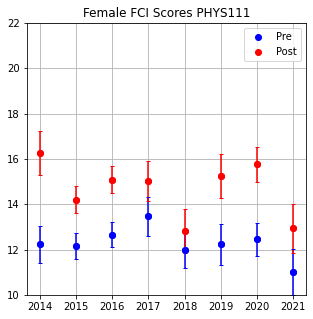

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)

plt.plot(df_111["YEAR"], df_111['Pre Score F'], 'bo')
plt.plot(df_111["YEAR"], df_111['Post Score F'], 'ro')
plt.errorbar(df_111["YEAR"], df_111['Pre Score F'], yerr = df_111['Pre Score F Error'], fmt='bo', capsize=2)
plt.errorbar(df_111["YEAR"], df_111['Post Score F'], yerr = df_111['Post Score F Error'], fmt='ro', capsize=2)
plt.grid()
ax.set_xticklabels([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
plt.title("Female FCI Scores PHYS111")
plt.legend(['Pre', 'Post'])
plt.ylim(10,22)

<ipython-input-13-c9a294b33f05>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])


(10.0, 22.0)

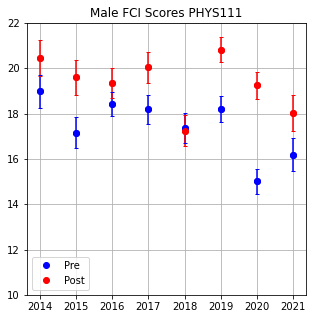

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)

plt.plot(df_111["YEAR"], df_111['Pre Score M'], 'bo')
plt.plot(df_111["YEAR"], df_111['Post Score M'], 'ro')
plt.errorbar(df_111["YEAR"], df_111['Pre Score M'], yerr = df_111['Pre Score M Error'], fmt='bo', capsize=2)
plt.errorbar(df_111["YEAR"], df_111['Post Score M'], yerr = df_111['Post Score M Error'], fmt='ro', capsize=2)
plt.grid()
ax.set_xticklabels([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
plt.title("Male FCI Scores PHYS111")
plt.legend(['Pre', 'Post'])
plt.ylim(10,22)

In [14]:
df4.to_excel('2014-2021.xlsx')

<ErrorbarContainer object of 3 artists>

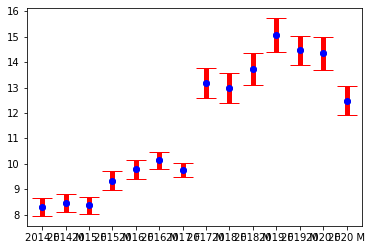

In [15]:
df112 = df4.loc[{2, 4, 6, 8, 10, 12, 14}]

x = ['2014 F', '2014 M', '2015 F', '2015 M', '2016 F', '2016 M', '2017 F', '2017 M', '2018 F', '2018 M', '2019 F', '2019 M', '2020 F', '2020 M']
y = np.concatenate([df112['Pre Score F'] , df112['Pre Score M']])
err = np.concatenate([df112['Pre Score F Error'] , df112['Pre Score M Error']])

plt.scatter(x,y)

plt.errorbar(x, y, yerr = err, fmt = 'o',color = 'blue', 
             ecolor = 'red', elinewidth = 5, capsize=10)


In [16]:
df4.to_excel("2014-2020_by_gender_by_year_incl2019.xlsx")

In [17]:
df4.iloc[11]

YEAR                   2019 112
Avg Grade             77.573913
Avg Grade Error        0.678243
Pre Score F           10.148352
Pre Score F Error      0.332639
Post Score F          15.032967
Post Score F Error     0.388101
Gain F                 4.884615
Norm Gain              0.246056
Norm Gain Error        0.016838
Gain Error sqrt        0.511147
Gain Error             0.306001
Num F                       182
Avg Grade F           77.958549
Avg Grade F error      0.836571
Pre Score M           14.340206
Pre Score M Error      0.633556
Post Score M          18.845361
Post Score M Error     0.657259
Gain M                 4.505155
Norm gain M            0.287689
Norm gain error             NaN
Gain M Error           0.912898
Gain M error sqrt      0.417642
Num M                        97
Avg M Grade           77.485149
Avg M grade error       1.43972
Name: 12, dtype: object

In [18]:
pre = []
for i in range (1,31):
    string = "PRE Q" + str(i)
    pre.append(string)
post = []
for i in range (1,31):
    string = "POST Q" + str(i)
    post.append(string)

pre_2020 = ['PRE Q1'] 
for i in range (24, 53):
    string = 'PRE Q' + str(i)

    pre_2020.append(string)

post_2020 = ['POST Q1'] 
for i in range (35, 64):
    string = 'POST Q' + str(i)
    post_2020.append(string)

is_f = df20_111['PRE Q12']== 1
df_f = df20_111[is_f]

avg_grade_f = df_f['Percent Grade'].mean()

df_pre_f = df_f[pre_2020]
df_post_f = df_f[post_2020]

df_pre_f.columns = pre
df_post_f.columns = post

print("Before Thresh: ")
print(df_pre_f.shape)
print(df_post_f.shape)

df_pre_f = df_pre_f.dropna(thresh=25, axis=0)
df_post_f = df_post_f.dropna(thresh=25, axis=0)

print("After thresh:")
print(df_pre_f.shape)
print(df_post_f.shape)

idx = df_pre_f.index.intersection(df_post_f.index)

df_pre_f = df_pre_f.loc[idx]
df_post_f = df_post_f.loc[idx]
num_f = len(idx)

print("After pre+post match:")
print(df_pre_f.shape)
print(df_post_f.shape)

Before Thresh: 
(69, 30)
(69, 30)
After thresh:
(66, 30)
(52, 30)
After pre+post match:
(50, 30)
(50, 30)


In [19]:
#2019

df5 = pd.DataFrame(columns=column_names)

df5.loc[1] = by_gender_by_year(df19_111, "2019 111")
df5.loc[2] = by_gender_by_year(df19_111_001, "2019 111 001")
df5.loc[4] = by_gender_by_year(df19_112, "2019 112")
df5.loc[5] = by_gender_by_year(df19_112_001, "2019 112 001")
df5.loc[6] = by_gender_by_year(df19_112_002, "2019 112 002")

df5.to_excel("2019_by_lecture_section.xlsx")

df5

,YEAR,Avg Grade,Avg Grade Error,Pre Score F,Pre Score F Error,Post Score F,Post Score F Error,Gain F,Norm Gain,Norm Gain Error,...,Post Score M,Post Score M Error,Gain M,Norm gain M,Norm gain error,Gain M Error,Gain M error sqrt,Num M,Avg M Grade,Avg M grade error
1,2019 111,71.595455,1.032202,12.234043,0.899796,15.255319,0.965869,3.021277,0.170060,0.041188,...,20.819549,0.560005,2.609023,0.221301,NaN,0.801634,0.329120,133,73.276596,1.245218
2,2019 111 001,71.595455,1.032202,12.234043,0.899796,15.255319,0.965869,3.021277,0.170060,0.041188,...,20.819549,0.560005,2.609023,0.221301,NaN,0.801634,0.329120,133,73.276596,1.245218
4,2019 112,77.573913,0.678243,10.148352,0.332639,15.032967,0.388101,4.884615,0.246056,0.016838,...,18.845361,0.657259,4.505155,0.287689,NaN,0.912898,0.417642,97,77.485149,1.439720
5,2019 112 001,76.920000,0.824998,9.891892,0.438401,15.126126,0.510835,5.234234,0.260305,0.020316,...,19.529412,0.955624,4.470588,0.299213,0.046829,1.343908,0.622678,51,79.735849,1.698875
6,2019 112 002,78.475862,1.143492,10.549296,0.507405,14.887324,0.597294,4.338028,0.223027,0.028948,...,18.086957,0.891086,4.543478,0.276090,NaN,1.213663,0.554042,46,75.000000,2.345964


In [20]:
### BY BACKGROUND

def by_background_by_year(df, name, ans):
    
    avg_grade = df["Percent Grade"].mean()
    avg_grade_error = df['Percent Grade'].sem()
    
    background = df['PRE Q75'] == ans
    df = df[background]
    
    pre = []
    for i in range (1,31):
        string = "PRE Q" + str(i)
        pre.append(string)
    post = []
    for i in range (1,31):
        string = "POST Q" + str(i)
        post.append(string)

    is_f = df['PRE Q85']== 'A'
    df_f = df[is_f]
    
    df_pre_f = df_f[pre].dropna(thresh=25, axis=0)
    df_post_f = df_f[post].dropna(thresh=25, axis=0)
    
    idx = df_pre_f.index.intersection(df_post_f.index)
    
    df_pre_f = df_pre_f.loc[idx]
    df_post_f = df_post_f.loc[idx]
    num_f = len(idx)
    
    pre_f = df_pre_f.apply(calculate_pre_score, axis=1).mean()
    pre_f_error = df_pre_f.apply(calculate_pre_score, axis=1).sem(axis=0)
    post_f =df_post_f.apply(calculate_post_score, axis=1).mean()
    post_f_error = df_post_f.apply(calculate_post_score, axis=1).sem(axis=0)
    norm_f = (post_f-pre_f)/(30-pre_f)
    norm_gain_error = (((df_pre_f.apply(calculate_pre_score, axis=1) - df_post_f.apply(calculate_post_score, axis=1)))/(30-(df_pre_f.apply(calculate_pre_score, axis=1)))).sem(axis=0)
    gain_f_error = np.sqrt(pre_f_error**2 + post_f_error**2)
    gain_f_error_1 = (df_pre_f.apply(calculate_pre_score, axis=1) - df_post_f.apply(calculate_post_score, axis=1)).sem(axis=0)
    
    avg_grade_f = df_f['Percent Grade'].mean()
    avg_grade_f_error = df_f['Percent Grade'].sem()
    
    is_m = df['PRE Q85']== 'B'
    df_m = df[is_m]
    
    avg_grade_m = df_m['Percent Grade'].mean()
    avg_grade_m_error = df_m['Percent Grade'].sem()
    
    df_pre_m = df_m[pre].dropna(thresh=25, axis=0)
    df_post_m = df_m[post].dropna(thresh=25, axis=0)
    
    idx = df_pre_m.index.intersection(df_post_m.index)
    
    df_pre_m = df_pre_m.loc[idx]
    df_post_m = df_post_m.loc[idx]
    num_m = len(df_pre_m.index)
    
    pre_m = df_pre_m.apply(calculate_pre_score, axis=1).mean()
    pre_m_error = df_pre_m.apply(calculate_pre_score, axis=1).sem(axis=0)
    post_m =df_post_m.apply(calculate_post_score, axis=1).mean()
    post_m_error = df_post_m.apply(calculate_post_score, axis=1).sem(axis=0)
    norm_m = (post_m-pre_m)/(30-pre_m)
    norm_m_error = (((df_pre_m.apply(calculate_pre_score, axis=1) - df_post_m.apply(calculate_post_score, axis=1)))/(30-(df_pre_m.apply(calculate_pre_score, axis=1)))).sem(axis=0)
    gain_m_error = np.sqrt(pre_m_error**2 + post_m_error**2)
    gain_m_error_1 = (df_pre_m.apply(calculate_pre_score, axis=1) - df_post_m.apply(calculate_post_score, axis=1)).sem(axis=0)
    
    array = [name, avg_grade, avg_grade_error, pre_f, pre_f_error, post_f, post_f_error, post_f-pre_f, norm_f, norm_gain_error, gain_f_error, gain_f_error_1, num_f, avg_grade_f, avg_grade_f_error, pre_m, pre_m_error, post_m, post_m_error, post_m-pre_m, norm_m, norm_m_error, gain_m_error, gain_m_error_1, num_m, avg_grade_m, avg_grade_m_error]
    return array

In [21]:
column_names=["YEAR", "Avg Grade", "Avg Grade Error", "Pre Score F", "Pre Score F Error", "Post Score F","Post Score F Error", "Gain F", "Norm Gain", "Norm Gain Error", "Gain Error sqrt","Gain Error", "Num F", "Avg Grade F", "Avg Grade F error", "Pre Score M", "Pre Score M Error", "Post Score M", "Post Score M Error", "Gain M", "Norm gain M", "Norm gain error", "Gain M Error", "Gain M error sqrt", "Num M", "Avg M Grade", "Avg M grade error"]
df7 = pd.DataFrame(columns=column_names)

df7.loc[1] = (by_background_by_year(df19_111, "No background 111", 'A'))
df7.loc[2] = (by_background_by_year(df19_111, "1 year background 111", 'B'))
df7.loc[3] = (by_background_by_year(df19_111, "2+ year background 111", 'C'))
df7.loc[4] = (by_background_by_year(df19_112, "No background 112", 'A'))
df7.loc[5] = (by_background_by_year(df19_112, "1 year background 112", 'B'))
df7.loc[6] = (by_background_by_year(df19_112, "2+ year background 112", 'C'))

df7.to_excel("2019_by_background_by_gender.xlsx")

df7

,YEAR,Avg Grade,Avg Grade Error,Pre Score F,Pre Score F Error,Post Score F,Post Score F Error,Gain F,Norm Gain,Norm Gain Error,...,Post Score M,Post Score M Error,Gain M,Norm gain M,Norm gain error,Gain M Error,Gain M error sqrt,Num M,Avg M Grade,Avg M grade error
1,No background 111,71.595455,1.032202,4.000000,NaN,12.000000,NaN,8.000000,0.307692,NaN,...,17.000000,3.000000,4.500000,0.257143,0.066667,3.905125,0.500000,2,60.500000,7.500000
2,1 year background 111,71.595455,1.032202,11.000000,1.069045,12.785714,1.054444,1.785714,0.093985,0.041901,...,18.000000,1.435210,2.148148,0.151832,NaN,2.002636,0.663891,27,67.500000,2.949531
3,2+ year background 111,71.595455,1.032202,13.031250,1.201884,16.437500,1.298990,3.406250,0.200737,0.056618,...,21.660194,0.594818,2.621359,0.239150,NaN,0.857268,0.380897,103,75.109091,1.357176
4,No background 112,77.573913,0.678243,7.846154,0.489482,13.769231,0.715607,5.923077,0.267361,0.030164,...,17.333333,1.255055,6.944444,0.354108,0.051591,1.567936,0.773213,18,71.578947,3.159795
5,1 year background 112,77.573913,0.678243,9.581081,0.414923,13.864865,0.528115,4.283784,0.209795,0.023433,...,18.782609,1.300587,5.130435,0.313830,0.060586,1.802025,0.768203,23,74.280000,3.923230
6,2+ year background 112,77.573913,0.678243,12.044118,0.641837,16.985294,0.705084,4.941176,0.275184,0.032479,...,19.222222,0.935243,3.481481,0.244156,NaN,1.277623,0.578403,54,80.527273,1.473184


In [22]:

# create table of average scores by gender by year
column_names=["YEAR", "Avg Grade", "Avg Grade Error", "Pre Score", "Pre Score", "Post Score","Post Score", "Gain", "Norm Gain", "Norm Gain Error", "Gain Error sqrt","Gain Error", "Num", "Avg Grade", "Avg Grade error"]
dfff = pd.DataFrame(columns=column_names)
dfff.loc[1] = (by_background_by_year(df19_111, "No background", 'A'))
dfff.loc[2] = (by_background_by_year(df19_111, "1 year background", 'B'))
dfff.loc[3] = (by_background_by_year(df19_111, "2+ year background", 'C'))

dfff.to_excel("2019_by_background.xlsx")

dfff

ValueError: cannot set a row with mismatched columns

In [ ]:
def tutorial_split(df, year):
    is_notut = df['Tertiary Section']== 'XM2'
    df_notut = df[is_notut]
    
    is_tut = df['Tertiary Section'] != 'XM2'
    df_tut = df[is_tut]
    
    column_names=["YEAR", "Avg Grade", "Avg Grade Error", "Pre Score F", "Pre Score F Error", "Post Score F","Post Score F Error", "Gain F", "Norm Gain", "Norm Gain Error", "Gain Error sqrt","Gain Error", "Num F", "Avg Grade F", "Avg Grade F error", "Pre Score M", "Pre Score M Error", "Post Score M", "Post Score M Error", "Gain M", "Norm gain M", "Norm gain error", "Gain M Error", "Gain M error sqrt", "Num M", "Avg M Grade", "Avg M grade error"]
    dfb  = pd.DataFrame(columns=column_names)
    
    dfb.loc[1] = by_gender_by_year(df, year)
    dfb.loc[2] = by_gender_by_year(df_tut, year + " tutorial")
    dfb.loc[3] = by_gender_by_year(df_notut, year + " no tutorial")
    
    return dfb

In [23]:
is_notut = df21_111['Tertiary Section']== 'XM2'
df_notut21 = df21_111[is_notut]

is_tut = df21_111['Tertiary Section'] != 'XM2'
df_tut21 = df21_111[is_tut]

column_names=["YEAR", "Avg Grade", "Avg Grade Error", "Pre Score F", "Pre Score F Error", "Post Score F","Post Score F Error", "Gain F", "Norm Gain", "Norm Gain Error", "Gain Error sqrt","Gain Error", "Num F", "Avg Grade F", "Avg Grade F error", "Pre Score M", "Pre Score M Error", "Post Score M", "Post Score M Error", "Gain M", "Norm gain M", "Norm gain error", "Gain M Error", "Gain M error sqrt", "Num M", "Avg M Grade", "Avg M grade error"]
dfb_2021  = pd.DataFrame(columns=column_names)

year = "2021"

dfb_2021.loc[1] = by_gender_by_year_2021(df21_111, year)
dfb_2021.loc[2] = by_gender_by_year_2021(df_tut21, year + " tutorial")
dfb_2021.loc[3] = by_gender_by_year_2021(df_notut21, year + " no tutorial")

In [24]:
is_notut = df20_111['Tertiary Section']== 'XM2'
df_notut20 = df20_111[is_notut]

is_tut = df20_111['Tertiary Section'] != 'XM2'
df_tut20 = df20_111[is_tut]

column_names=["YEAR", "Avg Grade", "Avg Grade Error", "Pre Score F", "Pre Score F Error", "Post Score F","Post Score F Error", "Gain F", "Norm Gain", "Norm Gain Error", "Gain Error sqrt","Gain Error", "Num F", "Avg Grade F", "Avg Grade F error", "Pre Score M", "Pre Score M Error", "Post Score M", "Post Score M Error", "Gain M", "Norm gain M", "Norm gain error", "Gain M Error", "Gain M error sqrt", "Num M", "Avg M Grade", "Avg M grade error"]
dfb_2020  = pd.DataFrame(columns=column_names)

year = "2020"

dfb_2020.loc[1] = by_gender_by_year_2020(df20_111, year)
dfb_2020.loc[2] = by_gender_by_year_2020(df_tut20, year + " tutorial")
dfb_2020.loc[3] = by_gender_by_year_2020(df_notut20, year + " no tutorial")

In [25]:
dftut1 = tutorial_split(df17_111, "2017")
dftut2 = dftut1.append(tutorial_split(df18_111, "2018"))
dftut3 = dftut2.append(tutorial_split(df19_111, "2019"))
dftut4 = dftut3.append(dfb_2020)
dftut5 = dftut4.append(dfb_2021)

dftut5.to_excel("By_tutorial.xlsx")

dftut5


NameError: name 'tutorial_split' is not defined

In [26]:
pre_tut_f = np.array([dftut5['YEAR'], dftut5['Pre Score F']])
post_tut_f = np.array([dftut5['YEAR'], dftut5['Post Score F']])

print(dftut5.index==3)

plt.plot(dftut5['YEAR'], dftut5['Pre Score F'], 'bo')
plt.plot(dftut5['YEAR'], dftut5['Post Score F'], 'ro')
#plt.plot(pre_tut_f, post_tut_f)

NameError: name 'dftut5' is not defined

In [27]:
no_tut = dftut5[dftut5.index==3]
no_tut

tut = dftut5[dftut5.index==2]
tut

fig, ax = plt.subplots()
fig.set_size_inches(5, 5)

plt.plot(no_tut["YEAR"], no_tut["Pre Score F"], 'bo')
plt.plot(no_tut["YEAR"], no_tut["Post Score F"], 'ro')
#plt.axvline(x=0, ymin=0.25, ymax=0.61, color='b')
#plt.axvline(x=1, ymin=0.06, ymax=0.15, color='b')
#plt.axvline(x=2, ymin=0.19, ymax=0.72, color='b')
#plt.axvline(x=3, ymin=0.57, ymax=0.94, color='b')
#plt.axvline(x=4, ymin=0.26, ymax=0.44, color='b')
plt.title('No Tutorial Female Pre + Post Scores')
ax.set_xticklabels([2017, 2018, 2019, 2020, 2021])
plt.errorbar(no_tut["YEAR"], no_tut["Pre Score F"],  yerr = no_tut["Pre Score F Error"], fmt='bo', capsize=2)
plt.errorbar(no_tut["YEAR"], no_tut["Post Score F"], yerr = no_tut["Post Score F Error"], fmt='ro', capsize=2)

plt.ylim(6,20)
plt.grid()

NameError: name 'dftut5' is not defined

NameError: name 'tut' is not defined

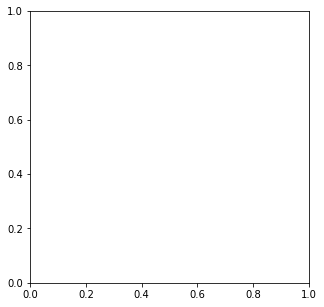

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)

plt.plot(tut["YEAR"], tut["Pre Score F"], 'bo')
plt.plot(tut["YEAR"], tut["Post Score F"], 'ro')
#plt.axvline(x=0, ymin=0.7, ymax=0.79, color='b')
#plt.axvline(x=1, ymin=0.45, ymax=0.64, color='b')
#plt.axvline(x=2, ymin=0.47, ymax=0.87, color='b')
#plt.axvline(x=3, ymin=0.43, ymax=0.94, color='b')
#plt.axvline(x=4, ymin=0.05, ymax=0.56, color='b')
ax.set_xticklabels([2017, 2018, 2019, 2020, 2021])
plt.grid()
plt.ylim(6,20)
plt.legend(["Pre", "Post"])
plt.errorbar(tut["YEAR"], tut["Pre Score F"],  yerr = tut["Pre Score F Error"], fmt='bo', capsize=2)
plt.errorbar(tut["YEAR"], tut["Post Score F"], yerr = tut["Post Score F Error"], fmt='ro', capsize=2)
plt.title('Tutorial Female Pre + Post Scores')

In [29]:
pre = []
for i in range (1,31):
    string = "PRE Q" + str(i)
    pre.append(string)
post = []
for i in range (1,31):
    string = "POST Q" + str(i)
    post.append(string)

pre_2020 = ['PRE Q1'] 
for i in range (24, 53):
    string = 'PRE Q' + str(i)
    pre_2020.append(string)

post_2020 = ['POST Q1'] 
for i in range (35, 64):
    string = 'POST Q' + str(i)
    post_2020.append(string)

df_pre_f = df20_111[pre_2020]
df_post_f = df20_111[post_2020]

df_pre_f.columns = pre
df_post_f.columns = post

df_pre_f = df_pre_f.dropna(thresh=25, axis=0)
df_post_f = df_post_f.dropna(thresh=25, axis=0)

#df_pre_f = df_pre_f.loc[idx]
#df_post_f = df_post_f.loc[idx]

print(df20_111.shape)
print(df_pre_f.shape)
print(df_post_f.shape)

(251, 127)
(233, 30)
(170, 30)


In [30]:
df14_111['PRE Q3'].value_counts(dropna=False)

C      105
NaN    102
B       21
A       17
E        7
D        3
Name: PRE Q3, dtype: int64

In [37]:
df4

,YEAR,Avg Grade,Avg Grade Error,Pre Score F,Pre Score F Error,Post Score F,Post Score F Error,Gain F,Norm Gain,Norm Gain Error,...,Post Score M,Post Score M Error,Gain M,Norm gain M,Norm gain error,Gain M Error,Gain M error sqrt,Num M,Avg M Grade,Avg M grade error
1,2014 111,69.474510,1.082683,12.222222,0.829926,16.266667,0.961585,4.044444,0.227500,0.028441,...,20.467742,0.799166,1.483871,0.134700,0.050007,1.077192,0.438582,62,69.521127,1.780722
2,2014 112,68.779528,0.943369,8.310000,0.353252,11.180000,0.468477,2.870000,0.132319,0.017428,...,14.838710,0.735226,1.661290,0.098754,0.044970,0.943322,0.617026,62,69.171053,1.887018
3,2015 111,71.400000,0.960303,12.162500,0.573807,14.187500,0.597488,2.025000,0.113525,0.022854,...,19.600000,0.767277,2.444444,0.190311,NaN,1.025604,0.418997,90,72.432692,1.420850
4,2015 112,71.942652,0.685932,8.467213,0.357092,12.090164,0.447335,3.622951,0.168253,0.016573,...,16.662791,0.688703,3.674419,0.215995,0.030372,0.902816,0.442429,86,75.065934,1.031589
5,2016 111,73.690909,0.852871,12.659091,0.553295,15.079545,0.598941,2.420455,0.139581,0.030271,...,19.353982,0.657655,0.929204,0.080275,NaN,0.850069,0.366009,113,74.929688,1.314253
6,2016 112,67.096220,0.980007,8.380368,0.337758,13.141104,0.423311,4.760736,0.220204,0.026061,...,17.592593,0.761897,3.876543,0.238059,0.043003,0.983351,0.548112,81,65.086957,1.938844
7,2017 111,72.291391,0.923681,13.461538,0.844404,15.019231,0.883266,1.557692,0.094186,0.053723,...,20.036364,0.671215,1.845455,0.156274,NaN,0.933165,0.466775,110,75.616667,1.371641
8,2017 112,72.822622,0.738361,9.341935,0.361355,14.696774,0.455325,5.354839,0.259213,0.018402,...,20.294872,0.609370,5.230769,0.350215,NaN,0.897224,0.491324,78,75.329545,1.454888
9,2018 111,77.843750,1.318512,11.976744,0.811387,12.813953,0.974910,0.837209,0.046452,0.038899,...,17.242105,0.687387,-0.126316,-0.010000,0.034499,0.966722,0.317903,95,75.407080,1.793091
10,2018 112,73.650000,0.719146,9.790419,0.365908,14.107784,0.438484,4.317365,0.213630,0.016885,...,18.701149,0.658081,4.241379,0.272929,0.033626,0.874193,0.467313,87,73.434343,1.545714


(20.0, 90.0)

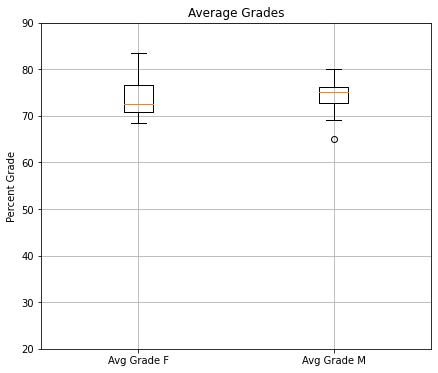

In [74]:
fig, ax = plt.subplots(figsize=(7,6))
ax.boxplot([df4["Avg Grade F"], df4["Avg M Grade"]])
ax.grid()
ax.set_ylabel("Percent Grade")
ax.set_xticklabels(["Avg Grade F", "Avg Grade M"])
ax.set_title("Average Grades")
ax.set_ylim(20,90)

(20.0, 90.0)

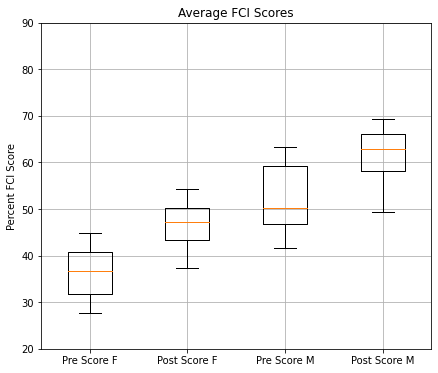

In [75]:
fig1, ax1 = plt.subplots(figsize=(7,6))
ax1.boxplot([df4["Pre Score F"]*100/30, df4["Post Score F"]*100/30, df4["Pre Score M"]*100/30, df4["Post Score M"]*100/30])
ax1.grid()
ax1.set_ylabel("Percent FCI Score")
ax1.set_xticklabels(["Pre Score F", "Post Score F", "Pre Score M", "Post Score M"])
ax1.set_title("Average FCI Scores")
ax1.set_ylim(20,90)